In [13]:
import pandas as pd
import numpy as np
from multiprocessing import cpu_count
from time import time
import matplotlib.pyplot as plt
import os

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, precision_score

In [14]:
os.getcwd()

'/Users/kieusontung/SonTung/WiDS'

# Load data

In [15]:
train = pd.read_csv('data/train_data.csv')
test = pd.read_csv('data/test_data.csv')

train

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375729,375729,1.0,0.866667,8/27/16,312.05,23.13,27.20,20.25,24.43,18.35,...,-15.64,-75.68,-3.09,6.93,-16.69,16.98,-13.85,50.25,-31.33,0.77
375730,375730,1.0,0.866667,8/28/16,305.82,23.13,27.20,20.25,24.43,18.35,...,-7.59,-76.42,-13.55,13.36,-15.96,20.45,-16.36,51.65,-30.73,10.10
375731,375731,1.0,0.866667,8/29/16,311.62,23.13,27.20,20.25,24.43,18.35,...,-6.25,-70.65,-23.93,22.62,-16.71,20.28,-15.48,48.58,-18.74,9.28
375732,375732,1.0,0.866667,8/30/16,304.54,23.13,27.20,20.25,24.43,18.35,...,-7.16,-57.67,-33.55,32.06,-16.07,16.60,-20.61,39.23,-16.26,-0.22


In [16]:
for col in train.columns:
    print(col)

index
lat
lon
startdate
contest-pevpr-sfc-gauss-14d__pevpr
nmme0-tmp2m-34w__cancm30
nmme0-tmp2m-34w__cancm40
nmme0-tmp2m-34w__ccsm30
nmme0-tmp2m-34w__ccsm40
nmme0-tmp2m-34w__cfsv20
nmme0-tmp2m-34w__gfdlflora0
nmme0-tmp2m-34w__gfdlflorb0
nmme0-tmp2m-34w__gfdl0
nmme0-tmp2m-34w__nasa0
nmme0-tmp2m-34w__nmme0mean
contest-wind-h10-14d__wind-hgt-10
nmme-tmp2m-56w__cancm3
nmme-tmp2m-56w__cancm4
nmme-tmp2m-56w__ccsm3
nmme-tmp2m-56w__ccsm4
nmme-tmp2m-56w__cfsv2
nmme-tmp2m-56w__gfdl
nmme-tmp2m-56w__gfdlflora
nmme-tmp2m-56w__gfdlflorb
nmme-tmp2m-56w__nasa
nmme-tmp2m-56w__nmmemean
contest-rhum-sig995-14d__rhum
nmme-prate-34w__cancm3
nmme-prate-34w__cancm4
nmme-prate-34w__ccsm3
nmme-prate-34w__ccsm4
nmme-prate-34w__cfsv2
nmme-prate-34w__gfdl
nmme-prate-34w__gfdlflora
nmme-prate-34w__gfdlflorb
nmme-prate-34w__nasa
nmme-prate-34w__nmmemean
contest-wind-h100-14d__wind-hgt-100
nmme0-prate-56w__cancm30
nmme0-prate-56w__cancm40
nmme0-prate-56w__ccsm30
nmme0-prate-56w__ccsm40
nmme0-prate-56w__cfsv20
nmme0-

In [17]:
tmp = pd.DataFrame(train.dtypes) \
        .rename(columns={0: 'type'})

tmp[tmp['type'] != 'float64']

,type
index,int64
startdate,object
climateregions__climateregion,object
mjo1d__phase,int64
mei__meirank,int64
mei__nip,int64


In [18]:
train.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
count,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,359800.000000,375734.000000,375734.000000,375734.000000,...,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000
mean,187866.500000,0.592766,0.517964,276.744064,10.801682,12.726739,10.099323,11.638229,10.733886,11.772646,...,-1.209959,-8.109918,6.800684,19.251970,-17.697565,-9.846867,-6.231860,16.014364,10.489945,11.296334
std,108465.207359,0.251744,0.272059,198.085182,10.952417,11.073553,10.339626,10.574276,9.403434,10.689967,...,37.317333,36.201507,38.458878,25.288526,31.946748,34.164678,27.050356,25.847455,25.070435,25.113214
min,0.000000,0.000000,0.000000,-2.310000,-14.960000,-14.970000,-11.720000,-17.560000,-13.720000,-13.330000,...,-94.570000,-89.940000,-64.870000,-39.280000,-100.560000,-106.080000,-93.980000,-52.610000,-66.110000,-57.610000
25%,93933.250000,0.409091,0.300000,104.062500,1.550000,3.650000,1.640000,3.080000,3.390000,2.970000,...,-27.200000,-33.350000,-19.650000,1.960000,-40.030000,-32.170000,-20.170000,-0.360000,-6.790000,-5.570000
50%,187866.500000,0.590909,0.533333,250.320000,9.950000,11.890000,9.490000,11.600000,10.890000,11.280000,...,-3.200000,-9.390000,2.330000,20.050000,-16.710000,-8.560000,-6.030000,18.650000,11.860000,11.650000
75%,281799.750000,0.818182,0.766667,420.010000,20.230000,22.110000,18.740000,20.360000,18.330000,20.300000,...,24.940000,17.960000,28.660000,35.090000,4.390000,10.500000,11.630000,31.210000,29.040000,29.180000
max,375733.000000,1.000000,1.000000,1185.140000,36.080000,36.030000,33.390000,34.640000,35.750000,38.350000,...,113.920000,96.550000,106.420000,91.760000,56.550000,83.890000,64.850000,90.390000,76.890000,88.660000


In [19]:
# count nulls
tmp = pd.DataFrame(train.isna().sum()) \
        .rename(columns={0: 'cnt'})

null_ls = tmp[tmp.cnt != 0].reset_index()
null_ls

,index,cnt
0,nmme0-tmp2m-34w__ccsm30,15934
1,nmme-tmp2m-56w__ccsm3,10280
2,nmme-prate-34w__ccsm3,8738
3,nmme0-prate-56w__ccsm30,15934
4,nmme0-prate-34w__ccsm30,15934
5,nmme-prate-56w__ccsm3,10280
6,nmme-tmp2m-34w__ccsm3,8738
7,ccsm30,15934


# Pre-processing

## Correlations

In [20]:
except_col = ['startdate', 'contest-tmp2m-14d__tmp2m']

data_col = []
data_corr = []

for col in train.columns:
    if col not in except_col:
        try:
            print('-------------------------')
            print(f'Processing {col}')
            corr = train['contest-tmp2m-14d__tmp2m'].corr(train[col])
            data_col.append(col)
            data_corr.append(corr)
        
        except TypeError:
            print(f'TypeError: {col}')
            
        except ValueError:
            print(f'ValueError: {col} not same length')

corr_train = pd.DataFrame(data={'col': data_col, 'corr': data_corr})

-------------------------
Processing index
-------------------------
Processing lat
-------------------------
Processing lon
-------------------------
Processing contest-pevpr-sfc-gauss-14d__pevpr
-------------------------
Processing nmme0-tmp2m-34w__cancm30
-------------------------
Processing nmme0-tmp2m-34w__cancm40
-------------------------
Processing nmme0-tmp2m-34w__ccsm30
-------------------------
Processing nmme0-tmp2m-34w__ccsm40
-------------------------
Processing nmme0-tmp2m-34w__cfsv20
-------------------------
Processing nmme0-tmp2m-34w__gfdlflora0
-------------------------
Processing nmme0-tmp2m-34w__gfdlflorb0
-------------------------
Processing nmme0-tmp2m-34w__gfdl0
-------------------------
Processing nmme0-tmp2m-34w__nasa0
-------------------------
Processing nmme0-tmp2m-34w__nmme0mean
-------------------------
Processing contest-wind-h10-14d__wind-hgt-10
-------------------------
Processing nmme-tmp2m-56w__cancm3
-------------------------
Processing nmme-tmp2m-56w

In [21]:
corr_train = corr_train.sort_values(by='corr', ascending=False)
corr_train[corr_train['corr'] >= 0.5].head(20)

,col,corr
19,nmme-tmp2m-56w__cfsv2,0.954668
75,nmme-tmp2m-34w__cfsv2,0.954483
24,nmme-tmp2m-56w__nmmemean,0.950865
80,nmme-tmp2m-34w__nmmemean,0.950187
21,nmme-tmp2m-56w__gfdlflora,0.949846
78,nmme-tmp2m-34w__gfdlflorb,0.949346
22,nmme-tmp2m-56w__gfdlflorb,0.949016
77,nmme-tmp2m-34w__gfdlflora,0.947379
18,nmme-tmp2m-56w__ccsm4,0.944435
74,nmme-tmp2m-34w__ccsm4,0.943234


In [22]:
corr_train_07 = corr_train[corr_train['corr'] >= 0.7]

In [23]:
# corr_train_07.to_csv('correlations_with_target_greater_0.7.csv')

In [24]:
corr_train.to_csv('data/correlations_with_target.csv')

In [2]:
import pandas as pd

corr_train = pd.read_csv('data/correlations_with_target.csv')
corr_train.head()

,Unnamed: 0,col,corr
0,19,nmme-tmp2m-56w__cfsv2,0.954668
1,75,nmme-tmp2m-34w__cfsv2,0.954483
2,24,nmme-tmp2m-56w__nmmemean,0.950865
3,80,nmme-tmp2m-34w__nmmemean,0.950187
4,21,nmme-tmp2m-56w__gfdlflora,0.949846


In [3]:
corr_train[corr_train['corr'] <= -0.7]

,Unnamed: 0,col,corr
236,57,contest-slp-14d__slp,-0.707640
237,98,wind-vwnd-250-2010-1,-0.731919
238,143,wind-hgt-850-2010-1,-0.779923
239,213,wind-hgt-100-2010-1,-0.802240
240,163,wind-hgt-500-2010-1,-0.806078
241,223,wind-vwnd-925-2010-1,-0.807371
242,203,wind-hgt-10-2010-1,-0.815701


## Fill nulls

In [30]:
mean_values = {}
for i in null_ls['index']:
    mean = train.loc[:, i].mean()
    mean_values[i] = mean

mean_values

{'nmme0-tmp2m-34w__ccsm30': 10.099322984991662,
 'nmme-tmp2m-56w__ccsm3': 9.663224126702678,
 'nmme-prate-34w__ccsm3': 31.26154696508954,
 'nmme0-prate-56w__ccsm30': 29.62399274596999,
 'nmme0-prate-34w__ccsm30': 29.65260622568093,
 'nmme-prate-56w__ccsm3': 32.00762760839941,
 'nmme-tmp2m-34w__ccsm3': 9.820987313213221,
 'ccsm30': 10.101533351862145}

In [12]:
for k, v in mean_values.items():
    train[k].fillna(value=v, inplace=True)

/var/folders/jl/ncw1ybbj0fs6f3mcht1ks56h0000gn/T/ipykernel_1657/3725902215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[k].fillna(value=v, inplace=True)


## Label encoder

In [31]:
le = LabelEncoder()

le.fit(train['climateregions__climateregion'])

train['climateregions__climateregion'] = le.fit_transform(train['climateregions__climateregion'])
test['climateregions__climateregion'] = le.fit_transform(test['climateregions__climateregion'])

## Check distributions

In [32]:
train['loc'] = train['lat'].round(4).astype('str') + '_' + train['lon'].round(4).astype('str')
test['loc'] = test['lat'].round(4).astype('str') + '_' + test['lon'].round(4).astype('str')

train.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,loc
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58,0.0_0.8333
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42,0.0_0.8333
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82,0.0_0.8333
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74,0.0_0.8333
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95,0.0_0.8333


In [35]:
loc_ls = pd.concat([train['loc'], test['loc']]).unique()

In [36]:
# check if there are any 'loc' in test that not in train

for loc in test['loc'].unique():
    if loc not in train['loc'].unique():
        print(loc)

In [37]:
train = train.drop(["index","startdate", "contest-tmp2m-14d__tmp2m"], axis=1)
test = test.drop(["index","startdate"], axis=1)

In [55]:
score_ls = []
loc_ls2 = []

score_json = {}

for _ in range(100):
    i = np.random.randint(len(loc_ls), size=1)[0]
    loc = loc_ls[i]

    loc_train = train.groupby('loc').get_group(loc).drop(columns='loc')
    loc_test = test.groupby('loc').get_group(loc).drop(columns='loc')

    X = pd.concat([loc_train, loc_test])
    y = [0] * len(loc_train) + [1] * len(loc_test)

    lgbm_cls = LGBMClassifier()
    cv_preds = cross_val_predict(lgbm_cls, X, y, cv=5, n_jobs=-1,
                                 method='predict_proba')
    y_pred = np.argmax(cv_preds, axis=1)
    score = precision_score(y, y_pred)

    score_ls.append(score)
    loc_ls2.append(loc)

    score_json[loc] = score

score_ls = np.array(score_ls)
loc_ls2 = np.array(loc_ls2)

print(loc_ls2[np.where(score_ls == score_ls.min())])

['0.2727_0.6333']


In [56]:
score_json

{'0.8182_0.4333': 0.8392857142857143,
 '0.9545_0.8333': 0.3197278911564626,
 '1.0_0.3': 0.375,
 '0.5_0.8': 0.8125,
 '0.3182_0.2': 0.8095238095238095,
 '0.3182_0.4': 0.8064516129032258,
 '0.5455_0.7': 0.8064516129032258,
 '0.4091_0.9333': 0.5111111111111111,
 '0.6364_0.5667': 0.43410852713178294,
 '0.8636_0.1': 0.5204081632653061,
 '0.6364_0.2667': 0.4628099173553719,
 '0.6364_0.1': 0.6829268292682927,
 '0.2727_0.4333': 0.5656565656565656,
 '0.9091_0.3': 0.691358024691358,
 '0.3636_0.2333': 0.5454545454545454,
 '0.1818_0.9333': 0.417910447761194,
 '0.2273_0.6333': 0.43410852713178294,
 '0.2727_0.5333': 0.8125,
 '0.5_0.7': 0.4830508474576271,
 '0.8182_0.8333': 0.8095238095238095,
 '0.2727_0.8': 0.4148148148148148,
 '0.9091_0.4333': 0.5402298850574713,
 '0.5_0.3333': 0.625,
 '0.4545_0.2667': 0.6470588235294118,
 '0.6364_0.6667': 0.6630434782608695,
 '0.5455_0.4333': 0.3953488372093023,
 '0.4091_0.9': 0.5053763440860215,
 '0.6818_0.5333': 0.3146067415730337,
 '0.9545_0.0': 0.80952380952380

In [57]:
import json

with open("score.json", "w") as outfile:
    json.dump(score_json, outfile)

# Feature importance

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
gbr = GradientBoostingRegressor(
    learning_rate=0.001,
    n_estimators=200,
    random_state=0
)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

gbr.score(X_test, y_test)

0.29692197855803915

In [64]:
lgbm = LGBMRegressor(
    n_estimators=200,
    n_jobs=-1,
)

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
lgbm.score(X_test, y_test)


0.9948466759051459

In [69]:
importance = lgbm.feature_importances_
feature_names = X_train.columns

In [70]:
forest_importances = pd.Series(importance, index=feature_names)
forest_importances.sort_values(ascending=False, inplace=True)

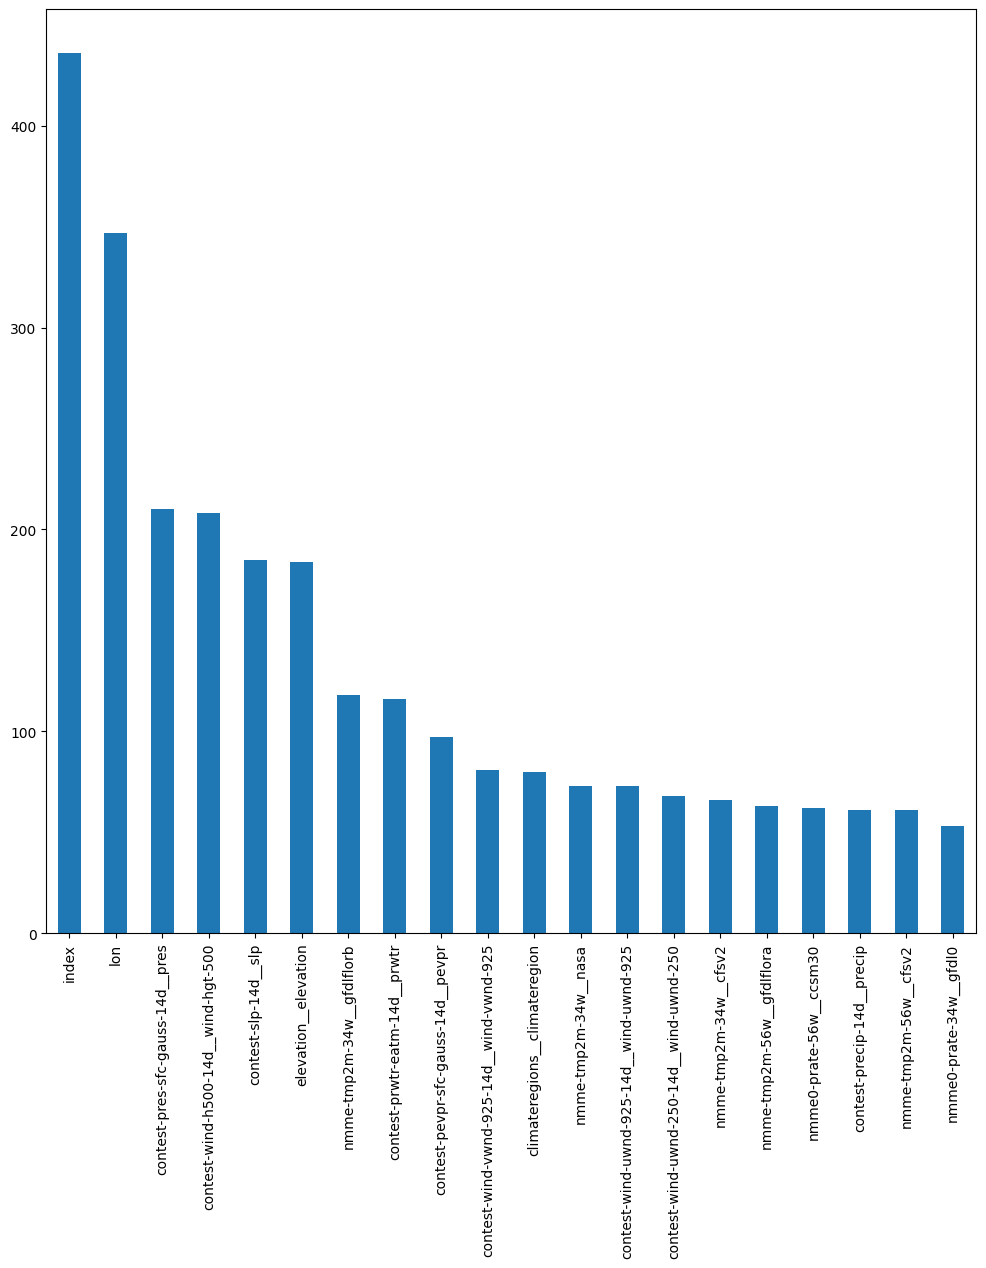

In [71]:
fig, ax = plt.subplots(figsize=(12, 12))
forest_importances[:20].plot.bar(ax=ax)
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=False)

0.7081628270334431